In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Modèle Cox-Ingresoll-Ross (CIR)

Le modèle Cox-Ingersoll-Ross (CIR) est utilisé en mathématiques financières pour modéliser l'évolution des taux d'intérêt court terme. Il s'agit de la solution de l'équation différentielle stochastique (EDS) :

$$ dr_t = \kappa (\mu - r_t)dt + \sigma \sqrt r_t dW_t $$ 

où : $(W_t)_{t \geq 0}$ est un mouvement brownien (processus de wiener) suivant la loi normale $N(0,dt)$

In [6]:
def inst_to_ann(r):
    """
    Convertir un taux d'intérêt instantané à un taux d'intérêt annuel
    """
    return np.exp(1-r)

def ann_to_inst(r):
    """
    Convertir un taux d'intérêt annuel à un taux d'intérêt instantané
    """
    return np.log(1+r)

In [29]:
def cir(r0=0.02, T=1, kappa=2, mu=0.03, sigma=0.01, N=253, n_scenarios=1):

    dt = T/N #time increment
    aleatoire = np.random.normal(0, scale=np.sqrt(dt), size=(N, n_scenarios))
    #each column is a scenario, each row is a period
    taux = np.empty_like(aleatoire)
    
    r0 = ann_to_inst(r0)
    taux[0] = r0
    
    for i in range(1,N):
        r_t = taux[i-1]
        dr_t = kappa*(mu-r_t)*dt + sigma*np.sqrt(r_t)*aleatoire[i]
        taux[i] = r_t +dr_t
        
    return pd.DataFrame(inst_to_ann(taux), index=np.arange(0,T-dt,dt))

In [30]:
r = cir(r0=0.03, T=1, kappa=0.03, mu=0.05, sigma=0.01, N=253, n_scenarios=500)

In [40]:
r.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0.000000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
0.003953,0.029935,0.030116,0.029908,0.030060,0.029977,0.030074,0.029835,0.030016,0.030058,0.029931,...,0.029960,0.030109,0.029887,0.029853,0.029882,0.030172,0.030060,0.030143,0.030098,0.030002
0.007905,0.029925,0.030120,0.030029,0.029969,0.029849,0.029933,0.030049,0.030040,0.029890,0.029937,...,0.030048,0.030059,0.029989,0.029977,0.029919,0.030237,0.030125,0.030167,0.030141,0.029968
0.011858,0.029693,0.029985,0.030102,0.029799,0.029738,0.029815,0.029959,0.029785,0.030014,0.029971,...,0.030135,0.030129,0.030093,0.029996,0.030006,0.030422,0.030060,0.030097,0.030452,0.029999
0.015810,0.029705,0.030196,0.030200,0.029722,0.029817,0.029824,0.029955,0.029662,0.030040,0.030006,...,0.030006,0.030106,0.030259,0.030046,0.029986,0.030460,0.030012,0.030135,0.030492,0.030065


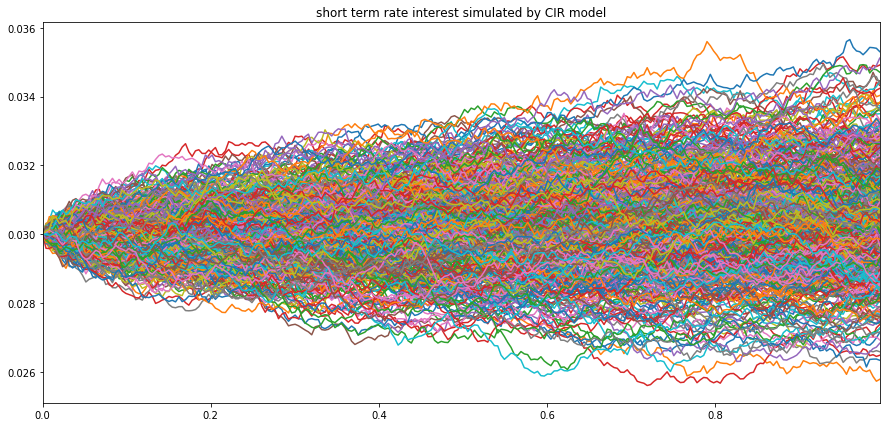

In [77]:
r.plot(figsize=(15,7), legend=False, title='short term rate interest simulated by CIR model')

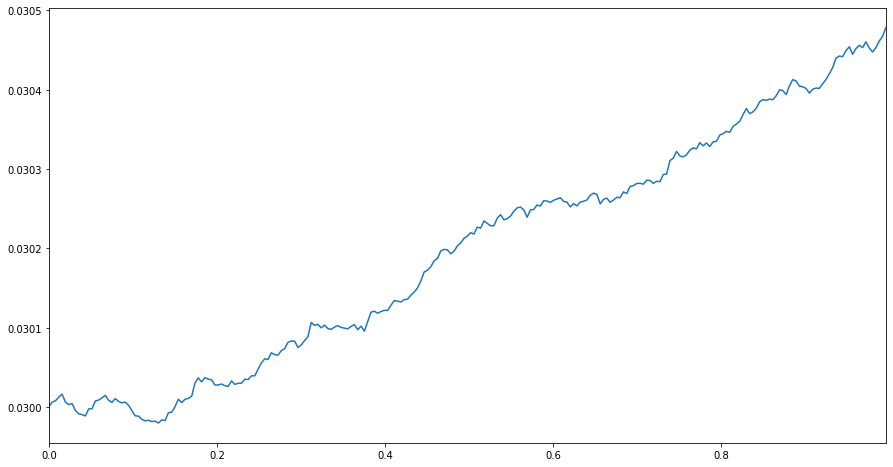

In [97]:
mean_rates_per_period = r.mean(axis='columns') #r.mean(axis=1)
mean_rates_per_period.plot(figsize=(15,8))

In [72]:
def vasicek(a, b, T, sigma, N, n_scenarios):
    
    dt = T/N #time increment
    aleatoire = np.random.normal(0, scale=np.sqrt(dt), size=(N, n_scenarios))
    #each column is a scenario, each row is a period
    taux = np.empty_like(aleatoire)
    
    a = ann_to_inst(a)
    taux[0] = a
    
    for i in range(1,N):
        r_t = (taux[i-1])
        dr_t = a*(b-r_t)*dt + sigma*aleatoire[i]
        taux[i] = r_t +dr_t
        
    return pd.DataFrame(inst_to_ann(taux))

In [93]:
vasicek_simulation = vasicek(a=0.03, b=0.05, T=1, sigma=0.05, N=253, n_scenarios=200)

In [94]:
vasicek_simulation

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.033245,0.021156,0.031273,0.031666,0.031962,0.033180,0.028028,0.026656,0.028933,0.027379,...,0.035300,0.030634,0.028520,0.032741,0.028820,0.028891,0.031655,0.030430,0.028888,0.023341
2,0.035498,0.015438,0.036430,0.033137,0.032509,0.029624,0.030252,0.023931,0.024317,0.023811,...,0.034472,0.026677,0.031956,0.033355,0.031361,0.029485,0.026031,0.029029,0.029342,0.023983
3,0.028874,0.018524,0.038284,0.028504,0.037086,0.026550,0.035008,0.020006,0.023605,0.021671,...,0.032445,0.026752,0.035697,0.037109,0.035581,0.024673,0.020384,0.024832,0.029085,0.027172
4,0.028585,0.009100,0.032569,0.028066,0.030681,0.029474,0.032161,0.027261,0.023834,0.022182,...,0.033148,0.026233,0.031605,0.035076,0.034633,0.030188,0.017026,0.025774,0.033734,0.027434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,-0.007181,-0.023424,-0.045396,0.010451,0.080154,0.017020,-0.017090,0.048358,0.040916,0.056823,...,0.077597,0.066725,-0.034472,0.094396,0.012183,0.040954,-0.088569,-0.066490,0.072676,0.023283
249,-0.004275,-0.032405,-0.047066,0.005344,0.085053,0.017731,-0.015154,0.048297,0.038273,0.054576,...,0.082363,0.070022,-0.036554,0.090759,0.009190,0.034368,-0.088102,-0.062292,0.072406,0.023017
250,-0.003892,-0.029401,-0.043757,0.007046,0.090543,0.017149,-0.013279,0.045391,0.037707,0.056492,...,0.084186,0.079102,-0.033671,0.095394,0.009482,0.036094,-0.090644,-0.060923,0.072535,0.021887
251,-0.007544,-0.031809,-0.041331,0.005569,0.089105,0.018843,-0.015232,0.051167,0.035681,0.058598,...,0.087112,0.082076,-0.031706,0.094424,0.008446,0.032955,-0.088086,-0.061571,0.079586,0.021186


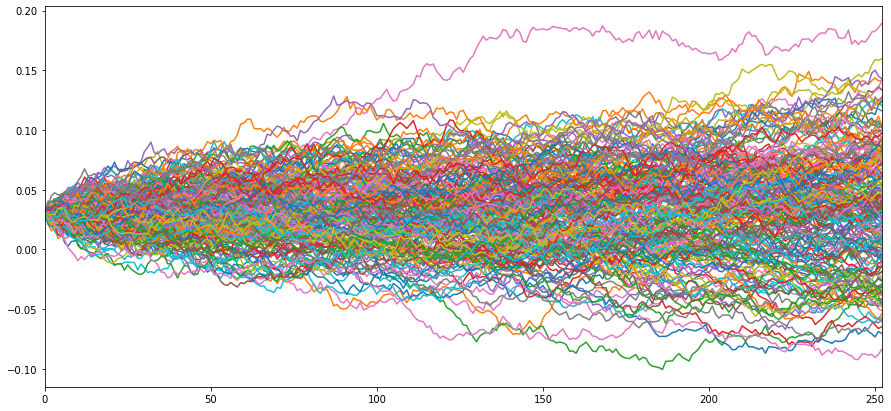

In [95]:
vasicek_simulation.plot(figsize=(15,7), legend=False)

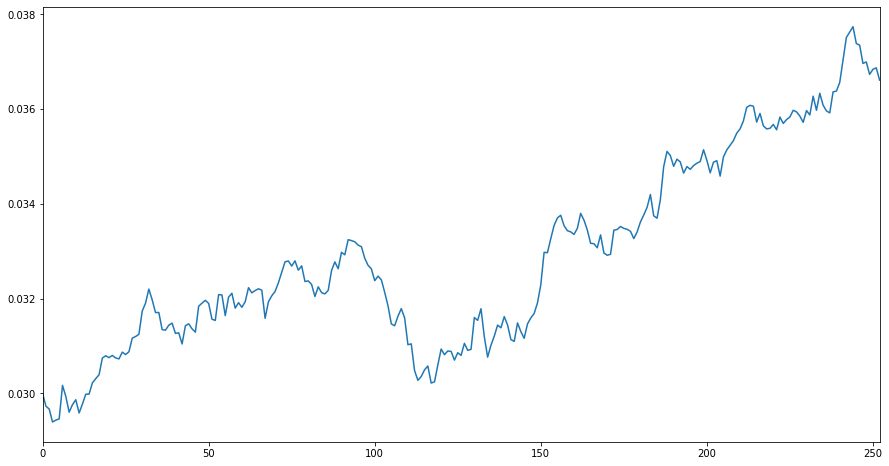

In [96]:
mean_rates_per_period_vasicek = vasicek_simulation.mean(axis='columns') #r.mean(axis=1)
mean_rates_per_period_vasicek.plot(figsize=(15,8))